In [ ]:
import tensorflow as tf
print(tf.__version__)
!pip install tensorflow==2.15.1
print(tf.__version__)

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the path to your dataset directory
train_data_dir = '/kaggle/input/unbalanced/unbalanced_split/train'
test_data_dir = '/kaggle/input/unbalanced/unbalanced_split/test'

# Set the hyperparameters
img_width = 224
img_height = 224
# img_width = 64
# img_height = 64
batch_size = 64
seed = 123

# Define the data generators with preprocessing steps
train_data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.3)
test_data_generator = ImageDataGenerator(rescale=1./255)

# Load the training and validation datasets using the data generator
train_generator = train_data_generator.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    shuffle=True,
    seed=seed,
    color_mode='rgb',
    class_mode='categorical',  # Set class_mode to 'categorical' for 3 classes
    subset='training'
)

validation_generator = train_data_generator.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    shuffle=True,
    seed=seed,
    color_mode='rgb',
    class_mode='categorical',  # Set class_mode to 'categorical' for 3 classes
    subset='validation'
)

# Load the test dataset using the data generator
test_generator = test_data_generator.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    shuffle=False,
    color_mode='rgb',
    class_mode='categorical'  # Set class_mode to 'categorical' for 3 classes
)


2024-09-26 18:49:00.796179: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-26 18:49:00.796233: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-26 18:49:00.797712: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 2352 images belonging to 3 classes.
Found 1007 images belonging to 3 classes.
Found 1442 images belonging to 3 classes.


In [2]:
import numpy as np
target_train=[]
target_val=[]
def extract_images_from_generator(generator):
    images = []
    targets=[]
    for _ in range(len(generator)):
        x_batch, y= next(generator)
        images.append(x_batch)
        targets.append(y)
    return np.vstack(images),np.vstack(targets)

# Reset the generators to start from the beginning
# train_generator.reset()
# validation_generator.reset()
# test_generator.reset()

# Extract images from the train, validation, and test generators
x_train_all,target_train = extract_images_from_generator(train_generator)
x_val_all,target_val = extract_images_from_generator(validation_generator)
# x_test_all,target_test= extract_images_from_generator(test_generator)

# Print shapes of the arrays to confirm
print(f"x_train_all shape: {x_train_all.shape}")
print(f"x_val_all shape: {x_val_all.shape}")
# print(f"x_test_all shape: {x_test_all.shape}")

x_train_all shape: (2352, 224, 224, 3)
x_val_all shape: (1007, 224, 224, 3)


In [3]:
# Get the number of images for each class in the training set
num_classes = 3

# Initialize counts for each class
class_counts_train = [0] * num_classes
class_counts_val = [0] * num_classes
class_counts_test = [0] * num_classes

# Count the occurrences of each class label in the training set
for label in train_generator.labels:
    class_counts_train[label] += 1
    # target_train.append(label)

# Count the occurrences of each class label in the validation set
for label in validation_generator.labels:
    class_counts_val[label] += 1

# Count the occurrences of each class label in the test set
for label in test_generator.labels:
    class_counts_test[label] += 1
    # target_test.append(label)

# Print the counts for each class
for i in range(num_classes):
    print("Number of images for class {} in the training set: {}".format(i, class_counts_train[i]))
    print("Number of images for class {} in the validation set: {}".format(i, class_counts_val[i]))
    print("Number of images for class {} in the test set: {}".format(i, class_counts_test[i]))


Number of images for class 0 in the training set: 432
Number of images for class 0 in the validation set: 185
Number of images for class 0 in the test set: 265
Number of images for class 1 in the training set: 1201
Number of images for class 1 in the validation set: 514
Number of images for class 1 in the test set: 736
Number of images for class 2 in the training set: 719
Number of images for class 2 in the validation set: 308
Number of images for class 2 in the test set: 441


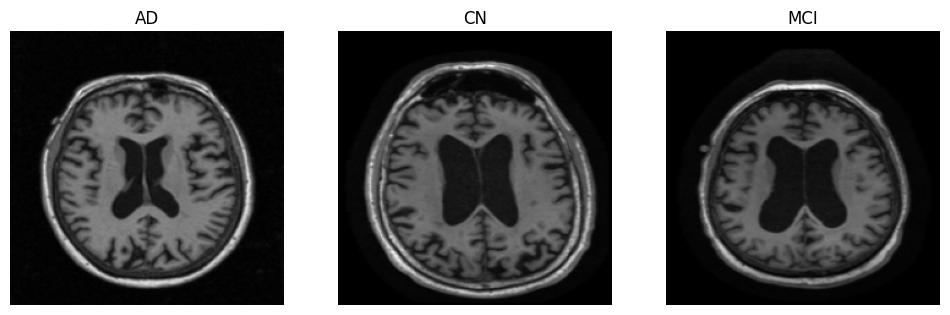

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import cv2

# Set the paths to the train dataset for the classes
train_path_MCI = "/kaggle/input/unbalanced/unbalanced_split/train/MCI"
train_path_AD = "/kaggle/input/unbalanced/unbalanced_split/train/AD"
train_path_CN = "/kaggle/input/unbalanced/unbalanced_split/train/CN"

# Get a list of all the image filenames in the train dataset directory for each class
# image_filenames_AD = os.listdir(train_path_AD)
image_filenames_CN = os.listdir(train_path_CN)
image_filenames_MCI = os.listdir(train_path_MCI)
image_filenames_AD = os.listdir(train_path_AD)

# Load two random images from each class
random.seed(123)  # for reproducibility
# random_AD = random.choice(image_filenames_AD)
random_CN = random.choice(image_filenames_CN)
random_MCI = random.choice(image_filenames_MCI)
random_AD = random.choice(image_filenames_AD)

# img_AD = cv2.imread(os.path.join(train_path_AD, random_AD))
img_CN = cv2.imread(os.path.join(train_path_CN, random_CN))
img_MCI = cv2.imread(os.path.join(train_path_MCI, random_MCI))
img_AD = cv2.imread(os.path.join(train_path_AD, random_AD))

# Convert images to RGB format
# rgb_img_AD = cv2.cvtColor(img_AD, cv2.COLOR_BGR2RGB)
rgb_img_CN = cv2.cvtColor(img_CN, cv2.COLOR_BGR2RGB)
rgb_img_MCI = cv2.cvtColor(img_MCI, cv2.COLOR_BGR2RGB)
rgb_img_AD = cv2.cvtColor(img_AD, cv2.COLOR_BGR2RGB)

# Resize the images to the same size
rgb_img_AD = cv2.resize(rgb_img_AD, (224, 224))
rgb_img_CN = cv2.resize(rgb_img_CN, (224, 224))
rgb_img_MCI = cv2.resize(rgb_img_MCI, (224, 224))

# Create a figure with three subplots
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Display the images on subplots
ax[0].imshow(rgb_img_AD)
ax[0].set_title("AD")
ax[0].axis('off')

ax[1].imshow(rgb_img_CN)
ax[1].set_title("CN")
ax[1].axis('off')

ax[2].imshow(rgb_img_MCI)
ax[2].set_title("MCI")
ax[2].axis('off')

# ax[2].imshow(rgb_img_AD)
# ax[2].set_title("AD")
# ax[2].axis('off')

# Show the figure
plt.show()


In [5]:
from sklearn.model_selection import StratifiedKFold
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
import gc

img_width, img_height = 224, 224
no_classes = 3
num_folds = 5
# batch_size = 32  # Adjust as needed

model_dir = '/kaggle/input/densenet/tensorflow2/default/1/RadImageNet-DenseNet121_notop.h5'
densenet_121 = load_model(model_dir)
densenet_121.trainable = True
fine_tune_at = 141

for layer in densenet_121.layers[:fine_tune_at]:
    layer.trainable = False

acc_per_fold = []
loss_per_fold = []

# Merge inputs and targets
input_data = np.concatenate((x_train_all, x_val_all), axis=0)
targets = np.concatenate((target_train, target_val), axis=0)
targets=np.argmax(targets,axis=1)

skf = StratifiedKFold(n_splits=num_folds,random_state=1, shuffle=True)

data_gen_args = dict(rescale=1./255)
image_data_gen = ImageDataGenerator()

def densenet_121_radimagenet():
  inputs = Input(shape=(img_width, img_height, 3))
  x = densenet_121(inputs)
  x = Flatten()(x)
  x = Dropout(0.2)(x)
  x = Dense(512, activation='relu')(x)
  x = BatchNormalization()(x)
  x = Dropout(0.2)(x)
  x = Dense(128, activation='relu')(x)
  x = BatchNormalization()(x)
  x = Dropout(0.2)(x)
  x = Dense(64, activation='relu')(x)
  x = BatchNormalization()(x)
  x = Dropout(0.2)(x)
  outputs = Dense(no_classes, activation='softmax')(x)
  model = Model(inputs=inputs, outputs=outputs)
  return model

# K-fold Cross Validation model evaluation
fold_no = 1
for train, val in skf.split(input_data, targets):

    # if 'training_generator' in locals():
    #     del training_generator
    # if 'val_generator' in locals():
    #     del val_generator
    # if 'history' in locals():
    #     del history
    # del model
    tf.keras.backend.clear_session()
    gc.collect()
    model = densenet_121_radimagenet()

    # Compile the model
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Define callbacks
    checkpoint = ModelCheckpoint(filepath=f'/kaggle/working/densenet_lr_{fold_no}.h5',
                                 save_weights_only=False,
                                 monitor='val_accuracy',
                                 mode='max',
                                 save_best_only=True)

    early_stopping = EarlyStopping(monitor='val_accuracy',
                                   min_delta=0.001,
                                   patience=5,
                                   verbose=1,
                                   restore_best_weights=True)

    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.000001)

    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    y_train=to_categorical(targets[train])
    y_val=to_categorical(targets[val])

    training_generator = image_data_gen.flow(input_data[train], y_train, batch_size=batch_size)
    val_generator = image_data_gen.flow(input_data[val], y_val, batch_size=batch_size)

    history = model.fit(training_generator,
                        validation_data=val_generator,
                        steps_per_epoch=len(training_generator),
                        validation_steps=len(val_generator),
                        epochs=100,
                        callbacks=[checkpoint,reduce_lr, early_stopping])

    model_best = tf.keras.models.load_model(f'/kaggle/working/densenet_lr_{fold_no}.h5')
    loss, accuracy = model_best.evaluate(val_generator)
    print(f'Score for fold {fold_no}: loss: {loss}; accuracy: {accuracy*100}%')
    acc_per_fold.append(accuracy * 100)
    loss_per_fold.append(loss)

    #del model
    #del training_generator
    #del val_generator
    #del history
    #del y_train
    #del y_val
    #tf.keras.backend.clear_session()
    #gc.collect()
    # Increase fold number
    fold_no += 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')


------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/100


I0000 00:00:1727376635.350934   13142 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


42/42 [==============================] - ETA: 0s - loss: 1.1823 - accuracy: 0.5329

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


42/42 [==============================] - 92s 837ms/step - loss: 1.1823 - accuracy: 0.5329 - val_loss: 2.1738 - val_accuracy: 0.4613 - lr: 0.0010
Epoch 2/100
42/42 [==============================] - 18s 417ms/step - loss: 0.6910 - accuracy: 0.7067 - val_loss: 0.8371 - val_accuracy: 0.6890 - lr: 0.0010
Epoch 3/100
42/42 [==============================] - 18s 418ms/step - loss: 0.4117 - accuracy: 0.8441 - val_loss: 0.7508 - val_accuracy: 0.7426 - lr: 0.0010
Epoch 4/100
42/42 [==============================] - 16s 369ms/step - loss: 0.2651 - accuracy: 0.9073 - val_loss: 1.1335 - val_accuracy: 0.6964 - lr: 0.0010
Epoch 5/100
42/42 [==============================] - 18s 421ms/step - loss: 0.1741 - accuracy: 0.9386 - val_loss: 0.6050 - val_accuracy: 0.8095 - lr: 0.0010
Epoch 6/100
42/42 [==============================] - 18s 423ms/step - loss: 0.1045 - accuracy: 0.9658 - val_loss: 0.4070 - val_accuracy: 0.8676 - lr: 0.0010
Epoch 7/100
42/42 [==============================] - 18s 430ms/step - 

In [6]:
import tensorflow
acc=[]
loss=[]
for i in range(1,6):
    print('------------------------------------------------------------------------\n')
    print(f"Model {i}")
    model_121_ = tensorflow.keras.models.load_model(f'/kaggle/working/densenet_lr_{i}.h5')


# Evaluate the model on the test data
    l, accuracy = model_121_.evaluate(test_generator)
    acc.append(accuracy)
    loss.append(l)

    print(f"Test loss: {round(l, 2)}")
    print(f"Test accuracy: {round(accuracy, 2)}")
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(len(acc)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss[i]} - Accuracy: {acc[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc)} (+- {np.std(acc)})')
print(f'> Loss: {np.mean(loss)}')
print('------------------------------------------------------------------------')


------------------------------------------------------------------------

Model 1
23/23 [==============================] - 11s 385ms/step - loss: 0.1774 - accuracy: 0.9390
Test loss: 0.18
Test accuracy: 0.94
------------------------------------------------------------------------

Model 2
23/23 [==============================] - 6s 177ms/step - loss: 0.1559 - accuracy: 0.9521
Test loss: 0.16
Test accuracy: 0.95
------------------------------------------------------------------------

Model 3
23/23 [==============================] - 6s 174ms/step - loss: 0.1439 - accuracy: 0.9598
Test loss: 0.14
Test accuracy: 0.96
------------------------------------------------------------------------

Model 4
23/23 [==============================] - 6s 171ms/step - loss: 0.1716 - accuracy: 0.9521
Test loss: 0.17
Test accuracy: 0.95
------------------------------------------------------------------------

Model 5
23/23 [==============================] - 6s 171ms/step - loss: 0.1602 - accuracy: 0.9535


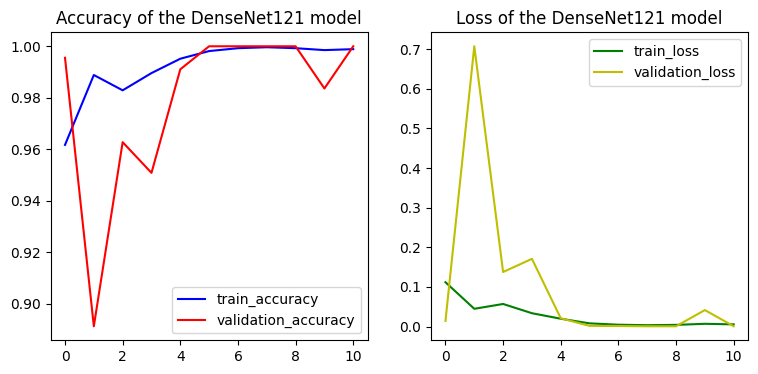

In [7]:
import matplotlib.pyplot as plt

# Create a figure and two subplots, side by side
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (9,4))

# Plot the accuracy score of our model in the left subplot
ax[0].plot(history.history['accuracy'], c = 'b', label = 'train_accuracy')
ax[0].plot(history.history['val_accuracy'], c = 'r', label = 'validation_accuracy')
ax[0].set_title('Accuracy of the DenseNet121 model')
ax[0].legend()

# Plot the loss value of our model in the right subplot
ax[1].plot(history.history['loss'], c = 'g', label = 'train_loss')
ax[1].plot(history.history['val_loss'], c = 'y', label = 'validation_loss')
ax[1].set_title('Loss of the DenseNet121 model')
ax[1].legend()

In [8]:
model_121_ = tensorflow.keras.models.load_model('/kaggle/working/densenet_lr_3.h5')

In [9]:
# Generate predictions for the validation dataset
y_pred = model_121_.predict(test_generator)
y_pred = y_pred.round()

# Get the true classes
y_true = test_generator.classes

23/23 [==============================] - 6s 171ms/step


In [10]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import numpy as np

# Generate predictions for the test dataset
y_pred = model_121_.predict(test_generator)
y_pred_labels = np.argmax(y_pred, axis=1)

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_labels))

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_labels)
print("Confusion Matrix:")
print(conf_matrix)

accuracy = accuracy_score(y_true, y_pred_labels)
print("\nAccuracy score: ",accuracy)


23/23 [==============================] - 4s 170ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       265
           1       0.97      0.98      0.97       736
           2       0.95      0.96      0.95       441

    accuracy                           0.96      1442
   macro avg       0.96      0.95      0.95      1442
weighted avg       0.96      0.96      0.96      1442

Confusion Matrix:
[[240  11  14]
 [  5 721  10]
 [  7  11 423]]

Accuracy score:  0.9597780859916782


23/23 [==============================] - 6s 176ms/step


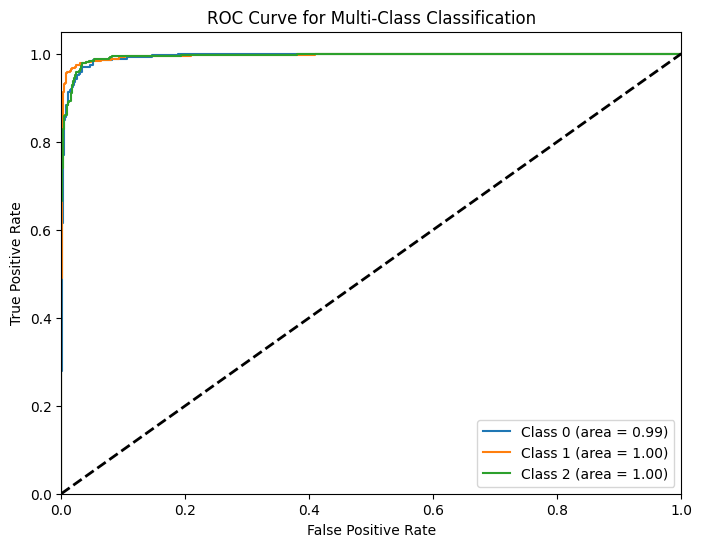

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
import numpy as np

# Load the model
model_121_ = tf.keras.models.load_model('/kaggle/working/densenet_lr_3.h5')

# Get the true labels and predictions
y_true = test_generator.classes  # Assuming test_generator has the true class labels
y_pred_prob = model_121_.predict(test_generator)  # Predict probabilities

# Binarize the labels for multi-class ROC
n_classes = 3  # Replace with the number of classes you have (e.g., 3 for AD, CN, MCI)
y_true_bin = label_binarize(y_true, classes=[0, 1, 2])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc='lower right')
plt.show()
